Penjelasan Preprocessing Data

Tujuan: Mengonversi data kategorikal menjadi numerik agar kompatibel dengan model Machine Learning.
Langkah:
Gunakan LabelEncoder untuk semua fitur dan target.
Pisahkan dataset menjadi fitur (X) dan target (y).
Bagi dataset menjadi training set (80%) dan testing set (20%) dengan stratifikasi untuk menjaga distribusi label.
Membangun Model

Tujuan: Melatih model klasifikasi Logistic Regression.
Langkah:
Inisialisasi model Logistic Regression dengan max_iter=1000 untuk memastikan konvergensi.
Melatih model menggunakan data training (X_train dan y_train).
Prediksi

Prediksi label (y_pred) dan probabilitas kelas positif (y_pred_proba) pada data testing.
Evaluasi

Hitung metrik evaluasi:
Akurasi: Rasio prediksi benar terhadap total data.
Presisi: Proporsi prediksi benar untuk kelas positif.
Recall: Kemampuan model menemukan semua instance positif.
F1-Score: Harmonic mean antara presisi dan recall.
AUC: Area di bawah kurva ROC (Receiver Operating Characteristic).
Visualisasi: Gambar ROC curve untuk melihat trade-off antara TPR (True Positive Rate) dan FPR (False Positive Rate).
Hasil:

Akurasi: 78%
Presisi: 77.1%
Recall: 78%
F1-Score: 77.2%
AUC: 77.2%

c:\Users\reyri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


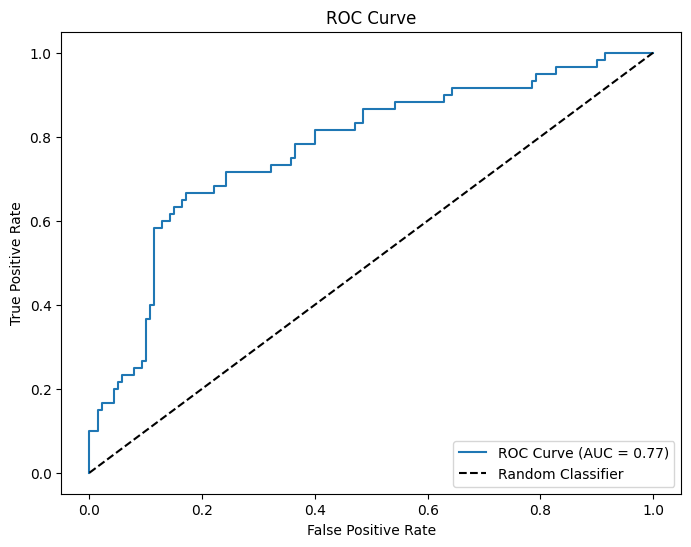

{'Accuracy': 0.785,
 'Precision': np.float64(0.7768752534126233),
 'Recall': np.float64(0.785),
 'F1-Score': np.float64(0.7782149500299504),
 'AUC': np.float64(0.7725)}

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import pandas as pd

# Load the uploaded dataset to check its structure and content
file_path = 'CreditDataset.csv'
credit_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
credit_data.head()


# Step 1: Preprocessing Data

# Separate features and target
X = credit_data.drop(columns=["Class"])  # Features
y = credit_data["Class"]  # Target

# Convert categorical features to numerical using Label Encoding
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Encode the target variable
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 2: Build Logistic Regression Model

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Step 3: Predictions
y_pred = logistic_model.predict(X_test)  # Predicted labels
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Step 4: Evaluation Metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Display evaluation metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
}

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

metrics
